# Used Car Sales EDA and Data Cleaning

## Exploratory Data Analysis (EDA)

In [1]:
##Load in data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv('vehicles.csv', parse_dates=["posting_date"], na_values=['other'])

print("Number of features: " +str(len(cars.columns)))
print("Number of rows: "+str(len(cars)))

Number of features: 26
Number of rows: 458213
36688


In [2]:
##Explore numerical features
cars.describe(include=[np.number])

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [3]:
##Explore categorical features
cars.describe(include=[object])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,458213,458213,458213,439993,453365,265273,285961,438617,455636,423585,270664,324025,136865,321315,317370,458185,458143,458213,458185
unique,458213,405,413,43,31519,6,7,4,6,2,133620,3,4,12,12,285404,384347,51,373175
top,https://boise.craigslist.org/ctd/d/garden-city...,columbus,https://bend.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1C4HJWDG6HL702229,4wd,full-size,sedan,white,https://images.craigslist.org/00c0c_1gCUGosl6w...,"👉 BAD Credit, NO Credit - OKAY! We FINANCE ANY...",ca,2020-12-01 07:50:10-07:00
freq,1,3818,2989,79666,8370,115685,105677,399399,439626,396322,194,139693,69736,92364,82786,194,247,51856,9


371645


Text(0, 0.5, 'Frequency')

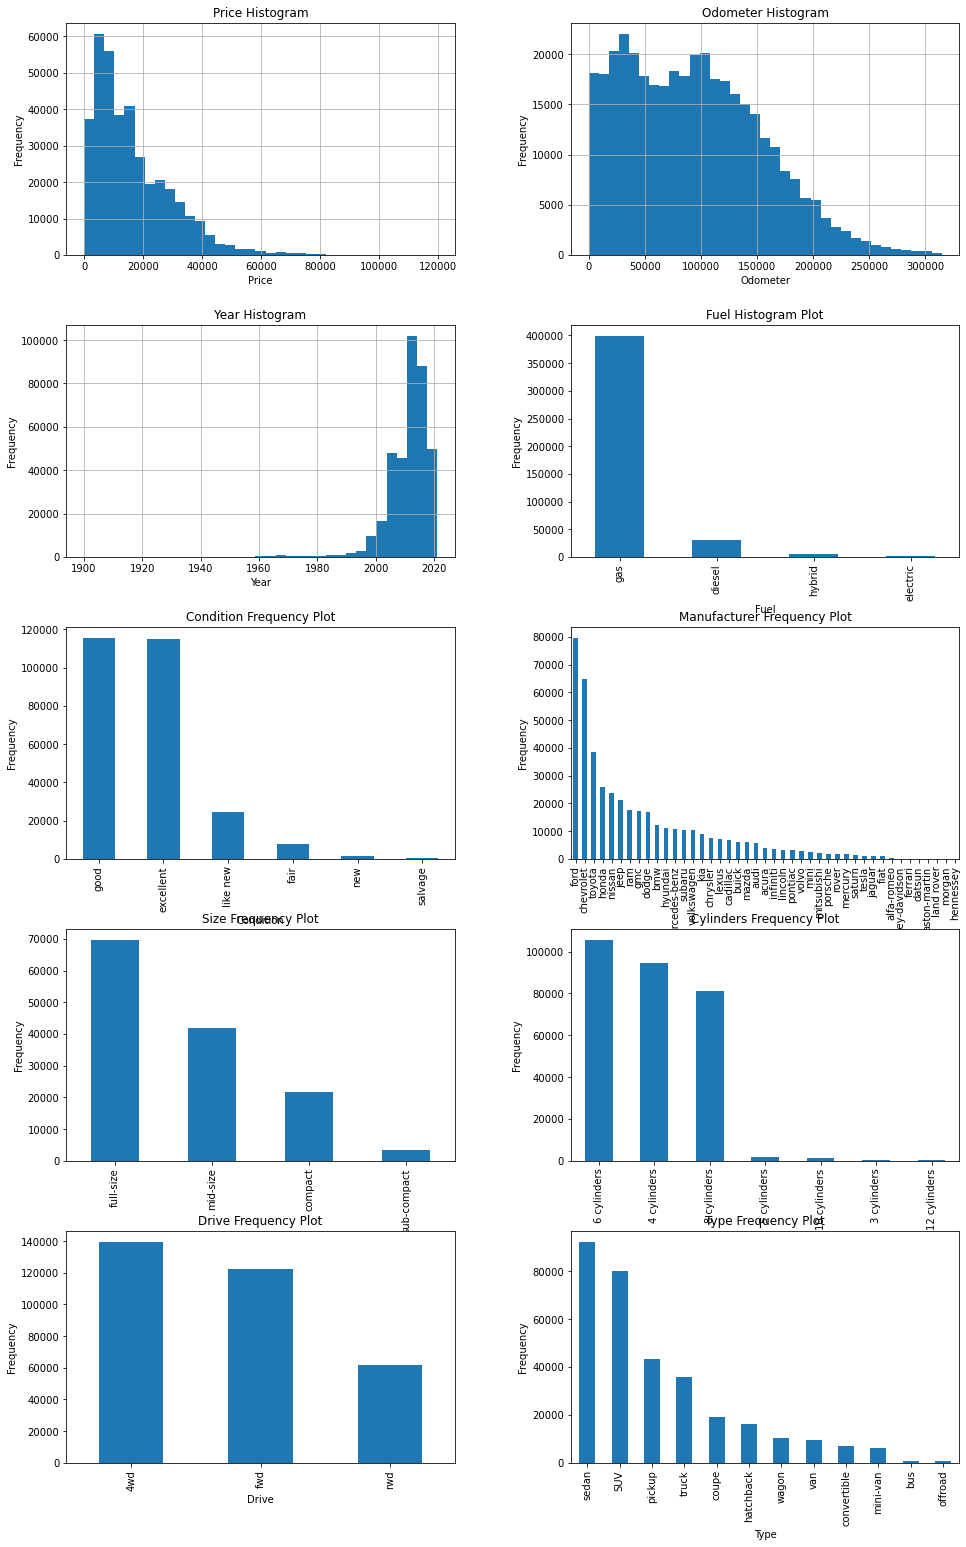

In [4]:
##Visualise the distribtions of important features (removing outliers to see true distributions)

##filter out outliers of price and odometer
price_hi = cars['price'].quantile(0.999)
price_lo = cars['price'].quantile(0.001)

odom_hi = cars['odometer'].quantile(0.995)
odom_lo = cars['odometer'].quantile(0.001)

cars_filtered = cars[(cars['price'] < price_hi) & (cars['price'] > price_lo) & (cars['odometer'] < odom_hi) & (cars['odometer'] > odom_lo)]
print(len(cars_filtered))

##Plot distributions
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,10))
fig.subplots_adjust(bottom = 5, top=7)

cars_filtered.hist(column='price', bins=35, ax=ax[0][0])
cars_filtered.hist(column='odometer', bins=35, ax=ax[0][1])

cars_filtered.hist(column='year', bins=35, ax=ax[1][0])
cars['fuel'].value_counts().plot(kind='bar', ax=ax[1][1])

cars['condition'].value_counts().plot(kind='bar', ax=ax[2][0])
cars['manufacturer'].value_counts().plot(kind='bar', ax=ax[2][1])

cars['size'].value_counts().plot(kind='bar', ax=ax[3][0])
cars['cylinders'].value_counts().plot(kind='bar', ax=ax[3][1])

cars['drive'].value_counts().plot(kind='bar', ax=ax[4][0])
cars['type'].value_counts().plot(kind='bar', ax=ax[4][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Year Histogram")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Fuel Histogram Plot")
ax[1][1].set_xlabel("Fuel")
ax[1][1].set_ylabel("Frequency")

ax[2][0].set_title("Condition Frequency Plot")
ax[2][0].set_xlabel("Condition")
ax[2][0].set_ylabel("Frequency")

ax[2][1].set_title("Manufacturer Frequency Plot")
ax[2][1].set_xlabel("Manufacturer")
ax[2][1].set_ylabel("Frequency")

ax[3][0].set_title("Size Frequency Plot")
ax[3][0].set_xlabel("Size")
ax[3][0].set_ylabel("Frequency")

ax[3][1].set_title("Cylinders Frequency Plot")
ax[3][1].set_xlabel("Cylinders")
ax[3][1].set_ylabel("Frequency")

ax[4][0].set_title("Drive Frequency Plot")
ax[4][0].set_xlabel("Drive")
ax[4][0].set_ylabel("Frequency")

ax[4][1].set_title("Type Frequency Plot")
ax[4][1].set_xlabel("Type")
ax[4][1].set_ylabel("Frequency")


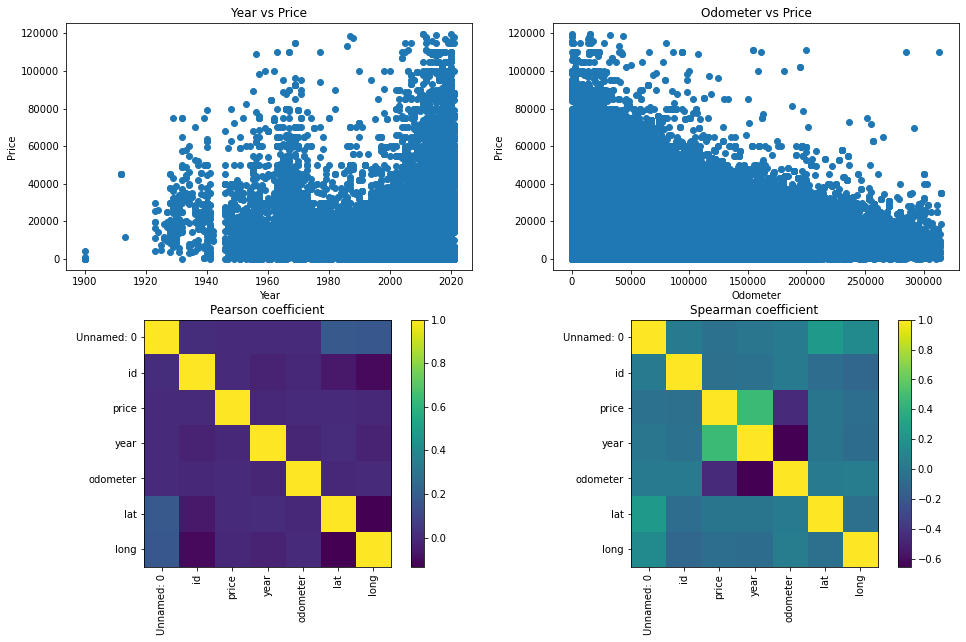

In [5]:
## Visualise some correlations between attributes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

##Price vs year
cars_filtered.plot(x='year', y='price', style='o', ax=ax[0][0])
ax[0][0].set_xlabel("Year")
ax[0][0].set_ylabel("Price")
ax[0][0].get_legend().remove()
ax[0][0].set_title("Year vs Price")

##Price vs odometer
cars_filtered.plot(x='odometer', y='price', style='o', ax=ax[0][1])
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Price")
ax[0][1].get_legend().remove()
ax[0][1].set_title("Odometer vs Price")


pearsoncorr = cars.corr(method='pearson')
spearmancorr = cars.corr(method='spearman')

pimg = ax[1][0].imshow(pearsoncorr)
simg = ax[1][1].imshow(spearmancorr)

ax[1][0].set_title("Pearson coefficient")
ax[1][0].set_xticks(np.arange(len(pearsoncorr.columns.tolist())))
ax[1][0].set_yticks(np.arange(len(pearsoncorr.columns.tolist())))
ax[1][0].set_xticklabels(pearsoncorr.columns.tolist(), rotation=90)
ax[1][0].set_yticklabels(pearsoncorr.columns.tolist())

ax[1][1].set_title("Spearman coefficient")
ax[1][1].set_xticks(np.arange(len(spearmancorr.columns.tolist())))
ax[1][1].set_yticks(np.arange(len(spearmancorr.columns.tolist())))
ax[1][1].set_xticklabels(spearmancorr.columns.tolist(), rotation=90)
ax[1][1].set_yticklabels(spearmancorr.columns.tolist())

plt.colorbar(pimg, ax=ax[1][0])
plt.colorbar(simg, ax=ax[1][1])

## Data Cleaning

371645
16
Rows :  371645
Features : 16


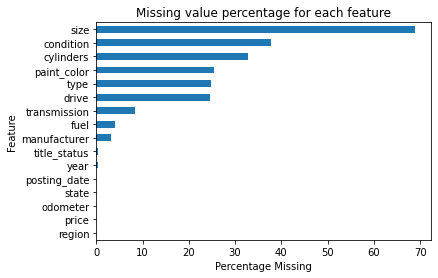

In [6]:
#Firstly ensure we are working with the dataset with removed outliers
cars = cars_filtered


#Remove obviously redundant features
cars = cars.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url', 'VIN', 'description', 'model', 'lat', 'long'], axis=1)

print(len(cars))
print(len(cars.columns))

def displayStats(df):
    print("Rows : ", len(df))
    print("Features :", len(df.columns))
    
    missing = df.isnull().sum()/len(df)*100
    missing = missing.sort_values()
    ax = missing.plot.barh(x='Percentage Missing', y='Feature')

    ax.set_title("Missing value percentage for each feature")
    ax.set_xlabel("Percentage Missing")
    ax.set_ylabel("Feature")
    
displayStats(cars)

Rows :  371645
Features : 16
316984


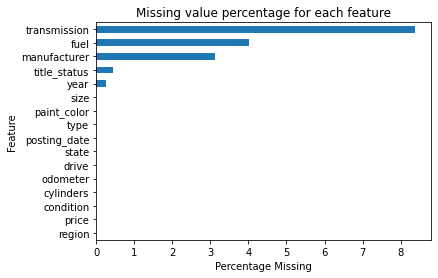

In [7]:
#Dropping all rows with missing data is not suitable, therefore we can fill in useful data

def fillCondition(row):
    if pd.isnull(row['condition']):
        year = row['year']
        if year>2019:
            return 'new'
        elif year>2017:
            return 'like new'
        elif year>2015:
            return 'excellent'
        elif year>2013:
            return 'good'
        else:
            return 'fair'
    else:
        return row['condition']


#condition - fill by year of car
cars['condition'] = cars.apply(fillCondition, axis=1)    


#Fill the rest through pandas fillna method
cars[['size', 'cylinders', 'paint_color', 'drive', 'type']] = cars[['size', 'cylinders', 'paint_color', 'drive', 'type']].fillna(method='ffill')

displayStats(cars)

cars_cleaned = cars.dropna()

print(len(cars_cleaned))

Text(0, 0.5, 'Frequency')

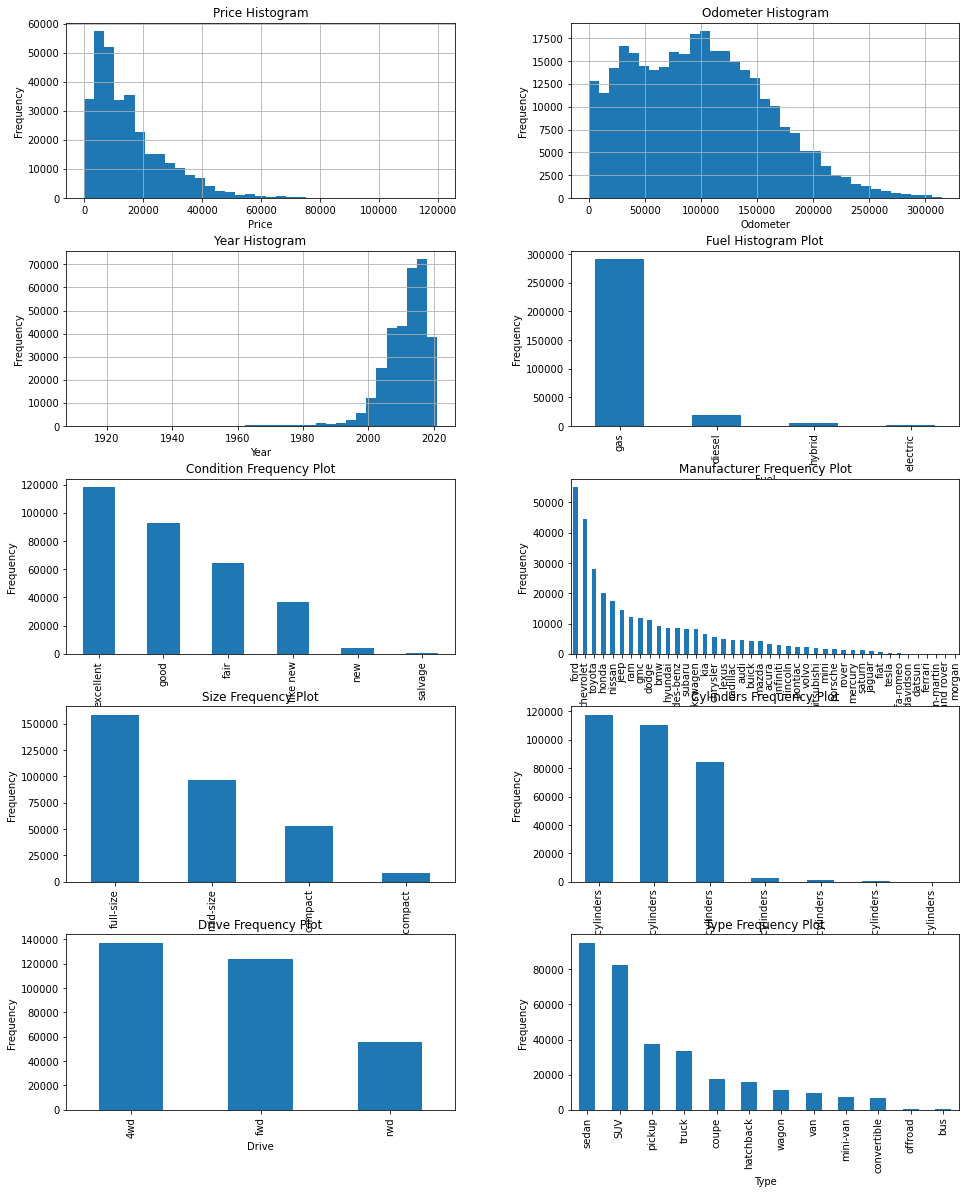

In [8]:
##Plot distributions of cleaned data

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,20))

cars_cleaned.hist(column='price', bins=35, ax=ax[0][0])
cars_cleaned.hist(column='odometer', bins=35, ax=ax[0][1])


cars_cleaned.hist(column='year', bins=35, ax=ax[1][0])
cars_cleaned['fuel'].value_counts().plot(kind='bar', ax=ax[1][1])

cars_cleaned['condition'].value_counts().plot(kind='bar', ax=ax[2][0])
cars_cleaned['manufacturer'].value_counts().plot(kind='bar', ax=ax[2][1])

cars_cleaned['size'].value_counts().plot(kind='bar', ax=ax[3][0])
cars_cleaned['cylinders'].value_counts().plot(kind='bar', ax=ax[3][1])

cars_cleaned['drive'].value_counts().plot(kind='bar', ax=ax[4][0])
cars_cleaned['type'].value_counts().plot(kind='bar', ax=ax[4][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Year Histogram")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Fuel Histogram Plot")
ax[1][1].set_xlabel("Fuel")
ax[1][1].set_ylabel("Frequency")

ax[2][0].set_title("Condition Frequency Plot")
ax[2][0].set_xlabel("Condition")
ax[2][0].set_ylabel("Frequency")

ax[2][1].set_title("Manufacturer Frequency Plot")
ax[2][1].set_xlabel("Manufacturer")
ax[2][1].set_ylabel("Frequency")

ax[3][0].set_title("Size Frequency Plot")
ax[3][0].set_xlabel("Size")
ax[3][0].set_ylabel("Frequency")

ax[3][1].set_title("Cylinders Frequency Plot")
ax[3][1].set_xlabel("Cylinders")
ax[3][1].set_ylabel("Frequency")

ax[4][0].set_title("Drive Frequency Plot")
ax[4][0].set_xlabel("Drive")
ax[4][0].set_ylabel("Frequency")

ax[4][1].set_title("Type Frequency Plot")
ax[4][1].set_xlabel("Type")
ax[4][1].set_ylabel("Frequency")


In [9]:
##Encoding of categorical data

#Everything one hot encoded apart from cylinders, condition, size and posting date
encoded_cars = pd.get_dummies(cars_cleaned, columns=['region', 'manufacturer','fuel','title_status','transmission','drive','type','paint_color','state'])


##Ordinal encoding or cylinders, condition, size and posting date
encoded_cars['cylinders'].replace(to_replace=['12 cylinders', '10 cylinders', '8 cylinders', '6 cylinders', '5 cylinders',
 '4 cylinders', '3 cylinders'], value=[12, 10, 8,6,5,4,3], inplace=True)

encoded_cars['condition'].replace(to_replace=['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], value=[5,4,3,2,1,0], inplace=True)

encoded_cars['size'].replace(to_replace=['full-size', 'mid-size', 'compact', 'sub-compact'], value=[3,2,1,0], inplace=True)

encoded_cars['posting_date'] = encoded_cars['posting_date'].apply(lambda x: x.month)

print(len(encoded_cars.columns))

544


In [10]:
##Normalisation 
cars_norm = (encoded_cars - encoded_cars.mean()) / (encoded_cars.max() - encoded_cars.min())

In [11]:
##Export to CSV
cars_norm.to_csv(r'C:\Users\Adam\Documents\Projects\Used Car EDA and machine learning\cleaned_vehicles.csv', index = False, header=True)


## Further EDA (now data has been cleaned and prepared)

In [32]:
##Decision Trees
from sklearn import tree
from sklearn.tree import export_text

y = cars_norm['price']
X = cars_norm.drop(['price'], axis=1)

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances)
names=[]
values = []

for i in indices[-15:]:
    names += [X.columns[i]]
    values += [importances[i]]
names = np.asarray(names)
values = np.asarray(values)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.bar(np.flip(names), np.flip(values))
ax.set_title("Top 15 feature importance values")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")

ax.set_xticklabels(np.flip(names), rotation=90)

|--- feature_0 <= 0.03
|   |--- feature_0 <= -0.00
|   |   |--- feature_453 <= 0.44
|   |   |   |--- feature_3 <= -0.04
|   |   |   |   |--- feature_0 <= -0.37
|   |   |   |   |   |--- feature_1 <= 0.01
|   |   |   |   |   |   |--- feature_518 <= 0.48
|   |   |   |   |   |   |   |--- feature_418 <= 0.36
|   |   |   |   |   |   |   |   |--- feature_0 <= -0.65
|   |   |   |   |   |   |   |   |   |--- feature_264 <= 0.49
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -0.74
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  -0.74
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |--- feature_264 >  0.49
|   |   |   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |   |--- feature_0 >  -0.65
|   |   |   |   |   |   |   |   |   |--- feature_444 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_525 

In [ ]:
##SVD and PCA
